<a href="https://colab.research.google.com/github/Blueorchid1711/ML/blob/main/Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 31.2MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/multiclass.csv')

In [ ]:
def process_data(dataframe):
  print("Shape:",dataframe.shape)
  print("Columns:",dataframe.columns)
  return dataframe.head()

In [ ]:
result =process_data(df)
print(result)

Shape: (440, 8)
Columns: Index(['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen', 'class'],
      dtype='object')
   Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  class
0       3  12669  9656     7561     214              2674        1338      2
1       3   7057  9810     9568    1762              3293        1776      2
2       3   6353  8808     7684    2405              3516        7844      2
3       3  13265  1196     4221    6404               507        1788      1
4       3  22615  5410     7198    3915              1777        5185      1


In [ ]:
num_classes = df['class'].nunique()
print(f"The number of classes is: {num_classes}")

The number of classes is: 3


In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class             440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Identify numerical columns (excluding the target variable 'class')
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'class' in numerical_cols:
    numerical_cols.remove('class')

print(f"Numerical columns to scale: {numerical_cols}")

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

display(df_scaled.head())

Numerical columns to scale: ['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,2
1,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,2
2,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,2
3,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1


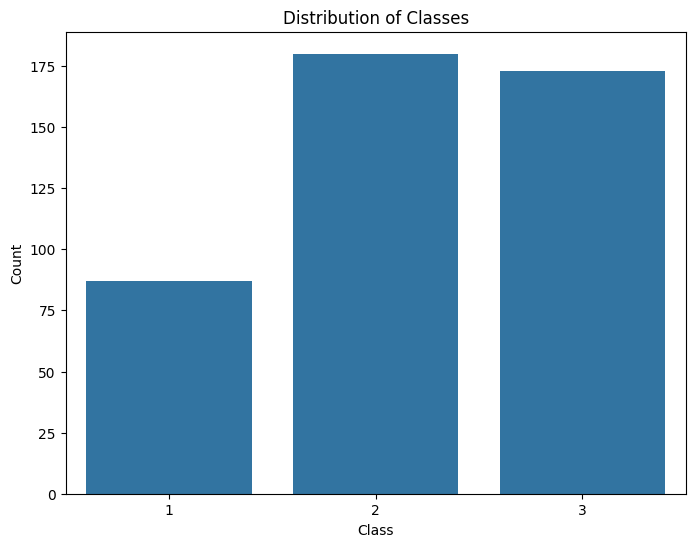

Class counts:
class
2    180
3    173
1     87
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Print class counts
print("Class counts:")
print(df['class'].value_counts())

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = df_scaled.drop('class', axis=1)
y = df_scaled['class']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_balanced, y_balanced = smote.fit_resample(X, y)

# Display the new class distribution
print("Class counts after SMOTE:")
print(y_balanced.value_counts())

Class counts after SMOTE:
class
2    180
1    180
3    180
Name: count, dtype: int64


In [ ]:
# Calculate the variance of each feature in the balanced dataset
feature_variance = X_balanced.var()

print("Variance of each feature in the balanced dataset:")
print(feature_variance)

Variance of each feature in the balanced dataset:
Region              0.998010
Fresh               0.872260
Milk                0.857310
Grocery             0.861062
Frozen              0.902701
Detergents_Paper    0.852916
Delicassen          0.833454
dtype: float64


In [ ]:
# Find features with absolute correlation greater than 0.6
high_correlation_pairs_0_6 = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Filter out self-correlations
high_correlation_pairs_0_6 = high_correlation_pairs_0_6[high_correlation_pairs_0_6 != 1.0]

# Get unique pairs
high_correlation_pairs_0_6 = high_correlation_pairs_0_6[::2]

# Filter for correlations greater than 0.6
high_correlation_pairs_0_6 = high_correlation_pairs_0_6[high_correlation_pairs_0_6 > 0.6]

print("Feature pairs with absolute correlation > 0.6:")
display(high_correlation_pairs_0_6)

Feature pairs with absolute correlation > 0.6:


Detergents_Paper  Grocery             0.925832
Milk              Grocery             0.738306
                  Detergents_Paper    0.671730
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

print("Training set shape:")
print(X_train.shape, y_train.shape)
print("\nTesting set shape:")
print(X_test.shape, y_test.shape)

Training set shape:
(432, 7) (432,)

Testing set shape:
(108, 7) (108,)


In [ ]:
def knn(X,Y, queryPoint, k):

  """Predict the class label for the query point"""

  dist = np.sqrt(np.sum((queryPoint-X)**2, axis=1))

  distances = [(dist[i],Y[i]) for i in range(len(dist))]

  distances = sorted(distances)

  distances = distances[:k]

  distances = np.array(distances)

  classes_counts = np.unique(distances[:,1], return_counts=True)

  index = classes_counts[1].argmax()
  pred = classes_counts [0] [index]

  return int (pred), distances

In [ ]:
# Use X_balanced, y_balanced for training data in knn function, and X_test for query points
pred, neighbors = knn(X_balanced.values, y_balanced.values, X_test.iloc[60].values, 7)

print(f'k nearest neighbors with the distance and class label : {neighbors}')
print(f'The predicted class label: {pred}')

k nearest neighbors with the distance and class label : [[0.         3.        ]
 [0.54740569 3.        ]
 [0.64625279 3.        ]
 [0.77222435 3.        ]
 [0.78752155 2.        ]
 [0.84967163 2.        ]
 [0.91046914 2.        ]]
The predicted class label: 3


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
knn.score(X_test, y_test)

0.8888888888888888

In [ ]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.94      0.89        36
           2       1.00      0.81      0.89        36
           3       0.85      0.92      0.88        36

    accuracy                           0.89       108
   macro avg       0.90      0.89      0.89       108
weighted avg       0.90      0.89      0.89       108

